# Solución por gradiente descendiente de la regresión logística

En este cuaderno se explora la solución por gradiente descendiente de la regresión logística.

**Predicciones:**
$$
\hat{y} =
  \begin{cases}
    1       & \quad \text{si } \sigma(\mathbf{x}^T\mathbf{w}) \ge 0.5\\
    0  & \quad \text{si } \sigma(\mathbf{x}^T\mathbf{w}) < 0.5
  \end{cases}
$$

También podemos usar simplemente $\sigma(\mathbf{x}^{T}\mathbf{w})$ si queremos conservar la probabilidad de que una observación $\mathbf{x}$ pertenezca a una clase en particular.

**Función de costo:**
$$
-\frac{1}{m}\sum_{i=1}^{n}y_i\ln(\hat{y}_i) + (1-y_i)\ln(1-\hat{y}_i)
$$

**Gradicente de la función de costo:**
$$
\frac{1}{m}X^{T}(\hat{y}-y)
$$
**Solución por gradiente dscendiente:**
```
repetir hasta criterio de parada {
    ...
    dw = ...
    w := w - alpha*dw
}
```

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification

In [225]:
plt.rc('font', family='serif')
%matplotlib inline

In [226]:
def plot_binary_classifcation(X, y, w=None):
    
    cmap = ListedColormap(['#FF0000', '#0000FF'])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01)
    )
    
    if w is not None:
        X_ = np.array([xx1.ravel(), xx2.ravel()]).T
        X_ = np.concatenate((np.ones((X_.shape[0], 1)), X_), axis=1)
        z = compute_predictions(X_.T, w)
        z = np.reshape(z, xx1.shape)
        plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)

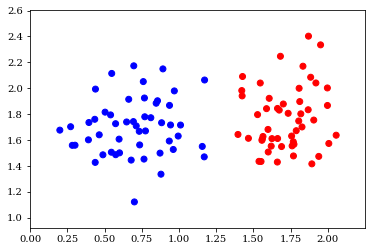

In [227]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1,
                           scale=0.5, shift=2)

rng = np.random.RandomState(42)
X += 0.5 * rng.uniform(size=X.shape)
plot_binary_classifcation(X, y)


Los modelos de clasificación buscan encontrar una función (curva, línea recta, compuesta, etc.) que permita separar *adecuadamente* los distintos grupos, en este caso los azules de los rojos.

In [228]:
print(y)

[1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1]


In [231]:
y==1

array([ True, False, False,  True,  True,  True, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
        True])

Observemos que, aunque nuestro modelo de regresión logística nos puede dar probabilidades, las salidas de los modelos de clasificación siempre son el id de la clase, no una probabilidad.


## Prgramación de gradiente descendiente

En este ejercicio vamos a implementar gradiente descendiente como solución al modelo conocido como **regresión logística**. Para esto es importante implementar varias funciones que nos permitan calcular el gradiente, la función de costo, etc. 

**Ejercicio 1:**
Implementa la función `sigmoid(z)`. Esta función debe funcionar para cuando `z` es un arreglo y no simplemente un escalar.

In [232]:
def sigmoid(z):
    activation = 1/(1+np.exp(-z))
    return activation

Vamos a hacer un gráfico sencillo que nos permita ver que la función si tiene la forma que esperamos (debe ser como la mostrada en las diapositivas)

(-10.0, 10.0)

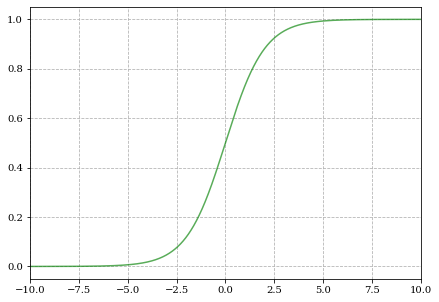

In [233]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(-10, 10)
ax.plot(np.linspace(-10, 10, num=10000), sigmoid(np.linspace(-10, 10, num=10000)), color='g', alpha=0.65)

**Ejercicio 2:** implementar la función que permite hacer predicciones usando la regresión logística. Incluye un argumento adicional que permita retornar las probabilidades de que los inputs pertenezcan a la clase 1

In [234]:
def compute_predictions(X, w, return_probs=False):
    
    probs = sigmoid(np.dot(X.T, w))
    
    if return_probs:
        return probs
    else:
        preds = probs >= 0.5
        return preds

**Ejercicio 3:** implementa la función `compute_cost(y, y_pred)` , la cual calcula el costo de las predicciones actuales del modelo de regresión logística.

In [235]:
def compute_cost(y, y_pred):
    cost = -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return cost

**Ejercicio 4:** implementa la función `compute_gradient(X, y, y_pred)`, la cual es necesaria para la implementación de gradiente descendiente.



In [236]:
def compute_gradient(X, y, y_pred):
    
    grad = np.dot(X.T, y_pred - y)/X.shape[0]
    
    return grad

**Ejercicio 5:** implementa la función `optimize_logistic_regression(X, y, learning_rate, num_iterations)`, la cual calcula los parámetros de la regresión logística. En esta ocación, el criterio de parada será simplemente un número de iteraciones. Para propositos ilustrativos, guarda en una lista el costo y los pesos en cada iteración

In [237]:
def optimize_logistic_regression(X, y, learning_rate=0.1, num_iterations=1000):
    
    y = np.reshape(y, newshape=(-1, 1))
    ones = np.ones(X.shape[0]).reshape(100,1)
    X = np.concatenate([ones,X],axis=1)
    num_points, num_features = X.shape
    
    rgen = np.random.RandomState(42)
    w = rgen.normal(loc=0.0, scale=0.01, size=(num_features, 1))
    
    costs = []
    weights = []
  
    for it in range(1, num_iterations+1):
        
        y_pred = compute_predictions(X.T, w, return_probs=True)
                
        cost = compute_cost(y, y_pred)
        
        dw = compute_gradient(X, y, y_pred)
        
        w = w - learning_rate*dw
        
        costs.append(cost)
        weights.append(w)
        
            
    return weights, costs

In [238]:
weights, costs = optimize_logistic_regression(X, y)

(100, 3)


Si hemos hecho todo bien, el siguiente código nos debe mostrar que la linea que separa los datos lo hace cada vez mejor

In [239]:
lista = [1,2,3,4,5,6]
lista[::2]

[1, 3, 5]

Cost is 0.6929291727104263


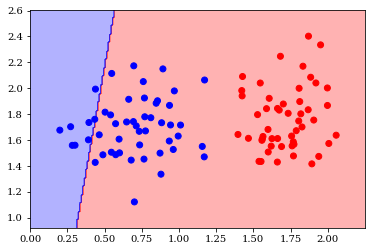

Cost is 0.33033099037965186


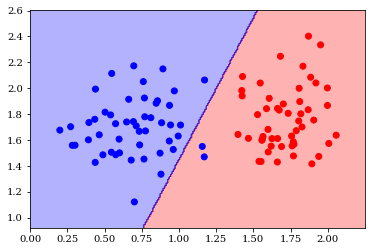

Cost is 0.22792885678103375


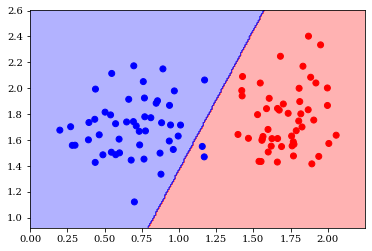

Cost is 0.18065926360855383


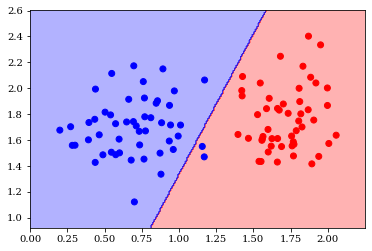

Cost is 0.1531488244718318


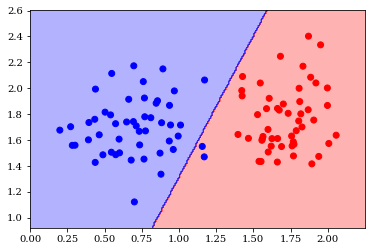

Cost is 0.1349427542341759


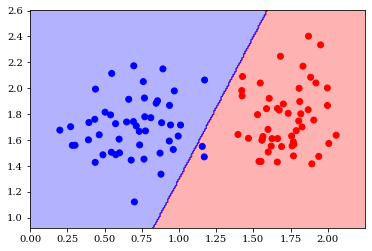

Cost is 0.12188241617102373


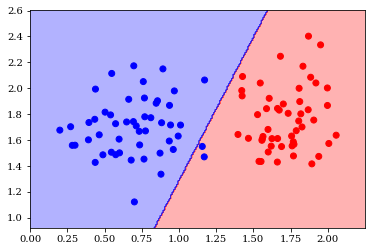

In [240]:
frec = int(len(weights)/6)
for w_, c_ in zip(weights[::frec], costs[::frec]):
    print("Cost is {}".format(c_))
    plot_binary_classifcation(X, y, w_)
    plt.show()

así mismo, la siguiente gráfica nos puede mostrar cómo varía el costo del modelo a lo largo de las iteraciones.

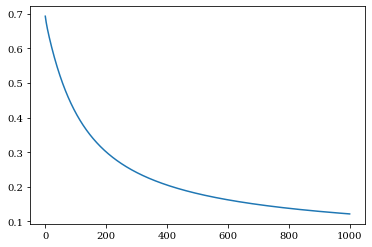

In [241]:
plt.plot(costs)